In [2]:
import os
from os.path import dirname
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

color = "#9a3324"
fpath_concat = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig2_diffusion analysis/SPT_results_AIO_concat-0Dex_noTR_0hr.csv"

df_all = pd.read_csv(fpath_concat)
os.chdir(dirname(fpath_concat))

## calculate error bounds
- D formula with errors (MSD: um^2, t: s, D: um^2/s, n: dimension, R: motion blur coefficient; doi:10.1103/PhysRevE.85.061916)
- diffusion dimension = 2. Note: This is the dimension of the measured data, not the actual movements! Although particles are doing 3D diffussion, the microscopy data is a projection on 2D plane and thus should be treated as 2D diffusion!
- MSD = 2 n D tau + 2 n sigma^2 - 4 n R D tau, n=2, R=1/6
- MSD = (4D - 8/6 D) tau + 4 sigma^2
- MSD = 8/3 D tau + 4 sigma^2

In [3]:
s_per_frame = 0.02
localization_error = df_all["linear_fit_sigma"].mean() / 1000
um_per_pxl = 0.117
link_max = 3
log10D_low = np.log10((localization_error**2) / ((8 / 3) * (s_per_frame)))
log10D_high = np.log10(((um_per_pxl * link_max) ** 2) / ((8 / 3) * (s_per_frame)))

# Coorelations: Why small R2 for mobile molecules? Constrained!

<Figure size 1800x1500 with 0 Axes>

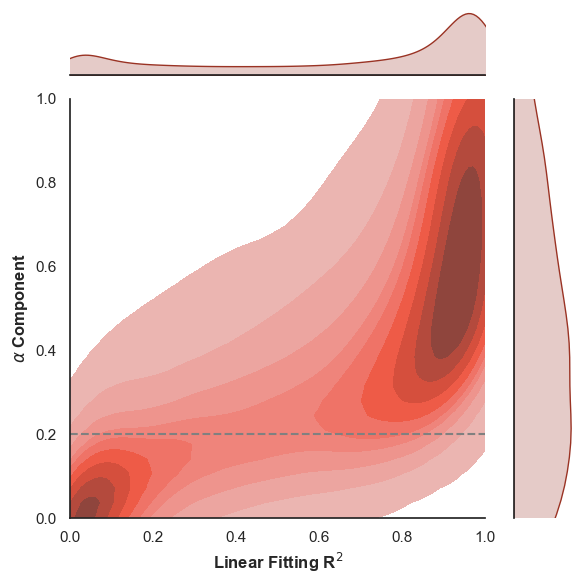

In [6]:
data = df_all[df_all["max_d_anytwo_nm"] > 200]
plt.figure(figsize=(6, 5), dpi=300)
sns.jointplot(
    data=data,
    x="linear_fit_R2",
    xlim=(0, 1),
    y="alpha",
    ylim=(0, 1),
    kind="kde",
    fill=True,
    color=color,
)
plt.axhline(0.2, color='gray', ls='--')
plt.xlabel(r"Linear Fitting R$^{2}$", weight="bold")
plt.ylabel(r"$\alpha$ Component", weight="bold")
plt.tight_layout()
plt.savefig("SM2.1.correlation_linearR2_alpha.png", format="png", bbox_inches="tight", dpi=300)
plt.show()

<Figure size 1800x1500 with 0 Axes>

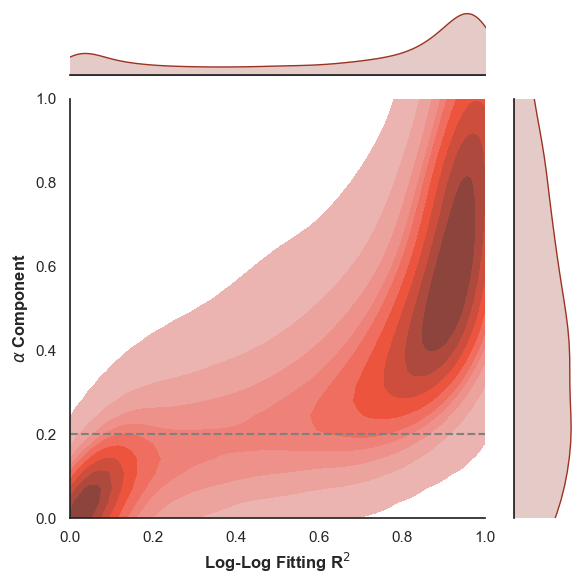

In [7]:
data = df_all[df_all["max_d_anytwo_nm"] > 200]
plt.figure(figsize=(6, 5), dpi=300)
sns.jointplot(
    data=data,
    x="loglog_fit_R2",
    xlim=(0, 1),
    y="alpha",
    ylim=(0, 1),
    kind="kde",
    fill=True,
    color=color,
)
plt.axhline(0.2, color='gray', ls='--')
plt.xlabel(r"Log-Log Fitting R$^{2}$", weight="bold")
plt.ylabel(r"$\alpha$ Component", weight="bold")
plt.tight_layout()
plt.savefig("SM2.2.correlation_loglogR2_alpha.png", format="png", bbox_inches="tight", dpi=300)
plt.show()

<Figure size 1800x1500 with 0 Axes>

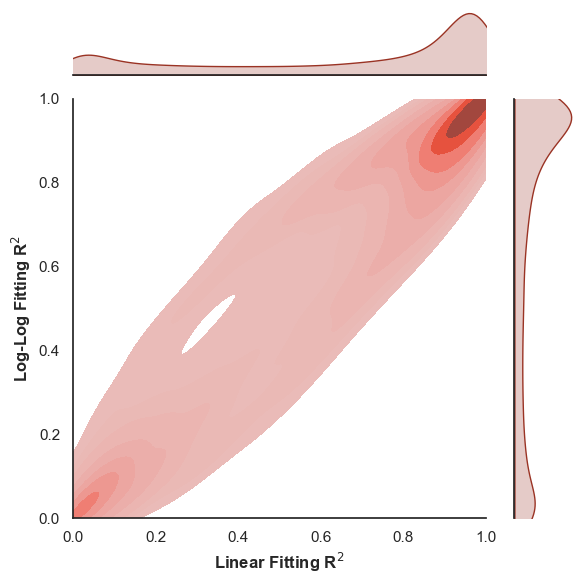

In [5]:
data = df_all[df_all['max_d_anytwo_nm'] > 200]
plt.figure(figsize=(6, 5), dpi=300)
sns.jointplot(
    data=data,
    x="linear_fit_R2",
    xlim=(0, 1),
    y="loglog_fit_R2",
    ylim=(0, 1),
    kind="kde",
    fill=True,
    color=color,
)
plt.xlabel(r"Linear Fitting R$^{2}$", weight="bold")
plt.ylabel(r"Log-Log Fitting R$^{2}$", weight="bold")
plt.tight_layout()
plt.savefig(
    "SM2.3.correlation_linearR2_loglogR2.png", format="png", bbox_inches="tight", dpi=300
)
plt.show()

## Unused Supplement Figures

<Figure size 1800x1500 with 0 Axes>

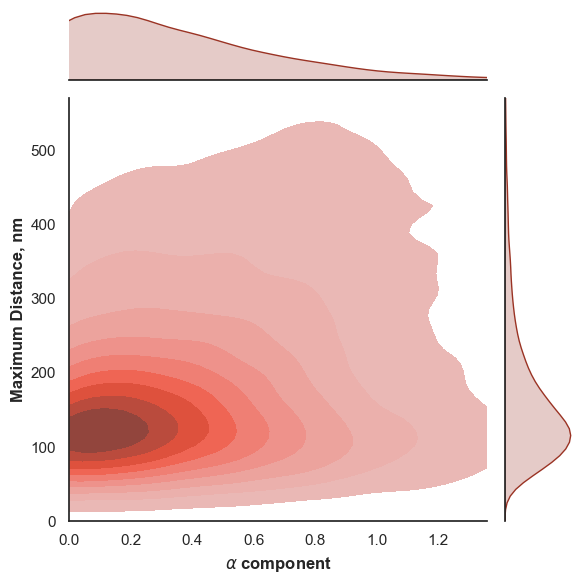

In [6]:
data = df_all
plt.figure(figsize=(6, 5), dpi=300)
sns.jointplot(
    data=data,
    x="alpha",
    xlim=(0, np.quantile(data['alpha'], 0.99)),
    y="max_d_anytwo_nm",
    ylim=(0, np.quantile(data['max_d_anytwo_nm'], 0.99)),
    kind="kde",
    fill=True,
    color=color,
)
plt.xlabel(r"$\alpha$ component", weight="bold")
plt.ylabel("Maximum Distance, nm", weight="bold")
plt.tight_layout()
# plt.savefig("correlation_alpha_maxDany2.png", format="png", bbox_inches="tight", dpi=300)
plt.show()

<Figure size 1800x1500 with 0 Axes>

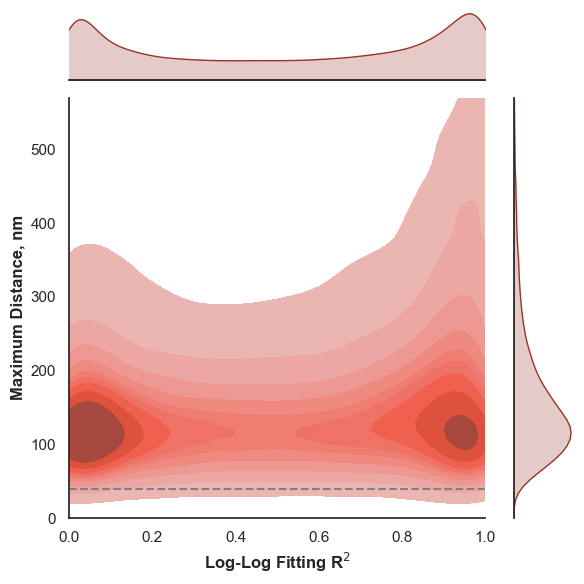

In [7]:
data = df_all
plt.figure(figsize=(6, 5), dpi=300)
sns.jointplot(
    data=data,
    x="loglog_fit_R2",
    xlim=(0, 1),
    y="max_d_anytwo_nm",
    ylim=(0, np.quantile(data['max_d_anytwo_nm'], 0.99)),
    kind="kde",
    fill=True,
    color=color,
)
plt.axhline(40, color='gray', ls='--')
plt.xlabel(r"Log-Log Fitting R$^{2}$", weight="bold")
plt.ylabel("Maximum Distance, nm", weight="bold")
plt.tight_layout()
# plt.savefig("correlation_loglogR2_maxDany2.png", format="png", bbox_inches="tight", dpi=300)
plt.show()

<Figure size 1800x1500 with 0 Axes>

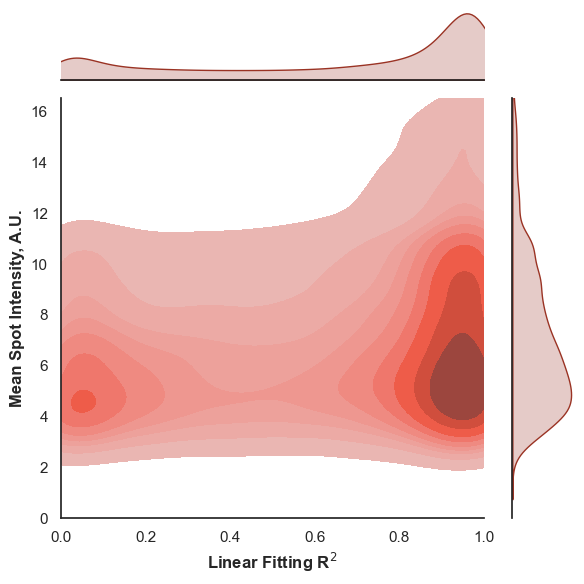

In [8]:
data = df_all[df_all['max_d_anytwo_nm'] > 200]
data = data[data["mean_spot_intensity_max_in_track"] < 20]
plt.figure(figsize=(6, 5), dpi=300)
sns.jointplot(
    data=data,
    x="linear_fit_R2",
    xlim=(0, 1),
    y="mean_spot_intensity_max_in_track",
    ylim=(0, np.quantile(data['mean_spot_intensity_max_in_track'], 0.99)),
    kind="kde",
    fill=True,
    color=color,
)
plt.xlabel(r"Linear Fitting R$^{2}$", weight="bold")
plt.ylabel("Mean Spot Intensity, A.U.", weight="bold")
plt.tight_layout()
# plt.savefig(
#     "unused-correlation_linearR2_intensity.png", format="png", bbox_inches="tight", dpi=300
# )
plt.show()

<Figure size 1800x1500 with 0 Axes>

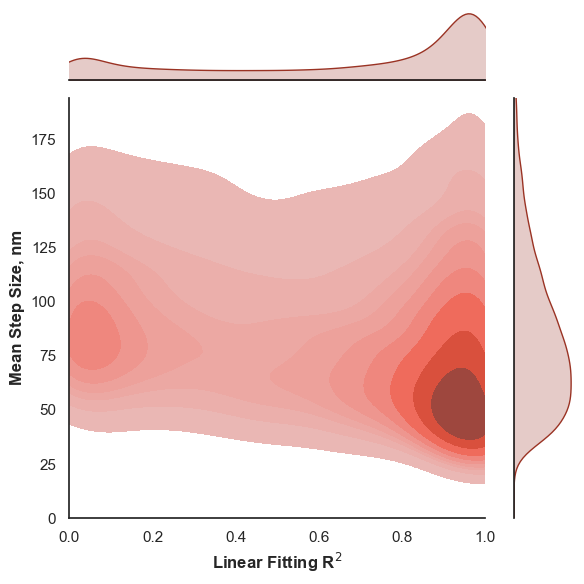

In [9]:
data = df_all[df_all['max_d_anytwo_nm'] > 200]
plt.figure(figsize=(6, 5), dpi=300)
sns.jointplot(
    data=data,
    x="linear_fit_R2",
    xlim=(0, 1),
    y="mean_stepsize_nm",
    ylim=(0, np.quantile(data['mean_stepsize_nm'], 0.99)),
    kind="kde",
    fill=True,
    color=color,
)
plt.xlabel(r"Linear Fitting R$^{2}$", weight="bold")
plt.ylabel("Mean Step Size, nm", weight="bold")
plt.tight_layout()
# plt.savefig(
#     "unused-correlation_linearR2_stepsize.png", format="png", bbox_inches="tight", dpi=300
# )
plt.show()

## Unused Supplement Figures: What distinguish static?

<Figure size 1800x1500 with 0 Axes>

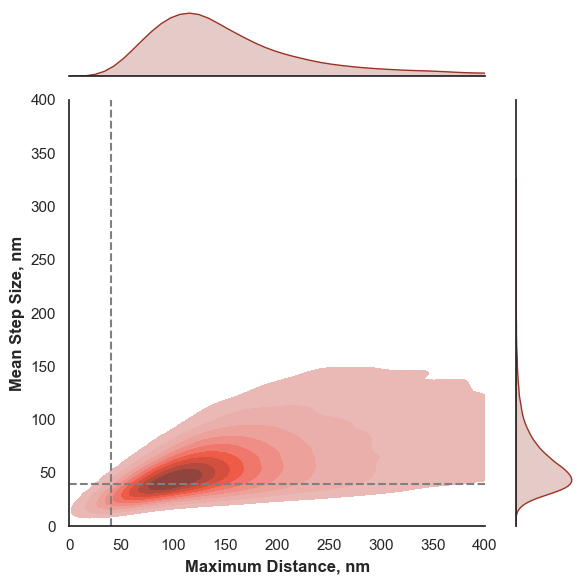

In [10]:
plt.figure(figsize=(6, 5), dpi=300)
sns.jointplot(
    data = df_all,
    x="max_d_anytwo_nm",
    xlim=(0, 400),
    y="mean_stepsize_nm",
    ylim=(0, 400),
    kind="kde",
    fill=True,
    color=color,
)
plt.axhline(40, color='gray', ls='--')
plt.axvline(40, color='gray', ls='--')
plt.xlabel("Maximum Distance, nm", weight="bold")
plt.ylabel("Mean Step Size, nm", weight="bold")
plt.tight_layout()
# plt.savefig("correlation_maxDany2_stepsize.png", format="png", bbox_inches="tight", dpi=300)
plt.show()